<a href="https://colab.research.google.com/github/mens0n/predict-survival-on-the-Titanic/blob/main/predict_survival_on_the_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving gender_submission.csv to gender_submission (1).csv
Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_submit = pd.read_csv("gender_submission.csv")

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# age 값이랑 상관 관계가 높은 컬럼에 대해 살펴보았다
corr_matrix = df_train.corr()
# corr_matrix['Embarked'].sort_values(ascending = False)[:5]
corr_matrix['Age'].sort_values(ascending = False)

Age            1.000000
Fare           0.096067
PassengerId    0.036847
Survived      -0.077221
Parch         -0.189119
SibSp         -0.308247
Pclass        -0.369226
Name: Age, dtype: float64

In [ ]:
# age값을 예측하려 했지만 평균값을 사용하는게 더 효율적이라 생각해 평균값을 넣는다
# 나머지 결측치는 'N'으로 대체
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())
df_train['Cabin'] = df_train['Cabin'].fillna('N')
df_train['Embarked'] = df_train['Embarked'].fillna('N')
print(df_train.isnull().sum().sum())

0


In [ ]:
print(df_train['Sex'].value_counts())
print(df_train['Cabin'].value_counts())
print(df_train['Embarked'].value_counts())

male      577
female    314
Name: Sex, dtype: int64
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64
S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [ ]:
# Cabin의 경우 선실 등급을 나타내는 첫번째 알파벳이 중요해 보여 첫 글자만 남기도록 했습니다
# 이 시절 등급에 따른 생존율의 확률차이가 크게 있을 것 같습니다.
df_train['Cabin'] = df_train['Cabin'].str[:1]
print(df_train['Cabin'].head())
print(df_train['Cabin'].value_counts())

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object
N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64


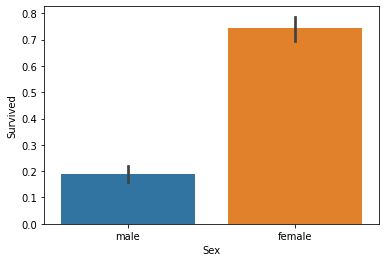

In [ ]:
# 사고 당시 여자와, 아이, 그리고 사람의 등급에 따른 생존율이 다를거라 생각이 들어 각각의 생존율을 비교해 보겠습니다

sns.barplot(data = df_train, x = 'Sex', y = 'Survived')

In [ ]:
df_train.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

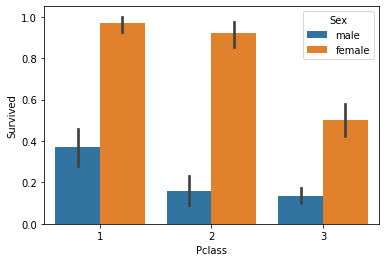

In [ ]:
sns.barplot(data = df_train, x = 'Pclass', y = 'Survived', hue = 'Sex')

{'boxes': [<matplotlib.lines.Line2D at 0x7fad1af6e7d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fad1aecf990>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fad1acd5450>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fad1acd5710>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fad1acfb1d0>,
  <matplotlib.lines.Line2D at 0x7fad1acd2450>]}

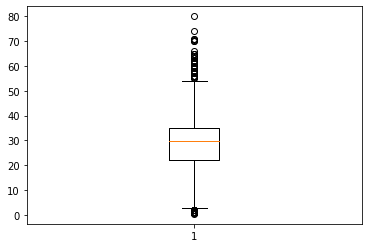

In [ ]:
# Age경우 값의 폭이 넓기 때문에 카테고리로 분류해서 값을 할당하겠습니다.
# 0~5 baby
# 6~12 child
# 12~18 teenager
# 19 ~ 25 student
# 26 ~ 35 young adult
# 35 ~ 60 adult
# 60 ~ elder
# 0 이하 값들은 이상치로 분류하겠습니다
plt.boxplot(df_train['Age'])

In [ ]:
def get_category(age):
  cat = ''
  if age < 0:
    cat = 'Unknown'
  elif age <= 5:
    cat = 'baby'
  elif age <= 12:
    cat = 'child'
  elif age <= 18:
    cat = 'teenager'
  elif age <= 25:
    cat = 'student'
  elif age <= 35:
    cat = 'young adult'
  elif age <= 60:
    cat = 'adult'
  else:
    cat = 'elder'
  return cat

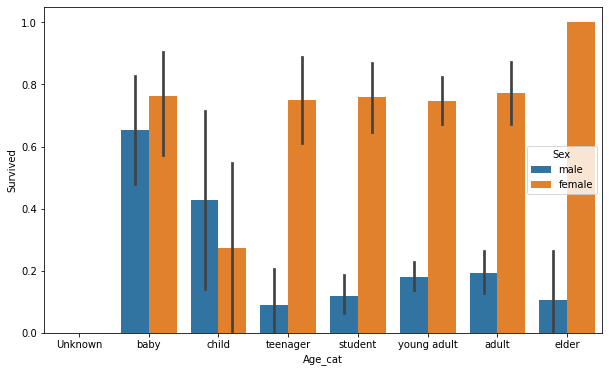

In [ ]:
plt.figure(figsize = (10, 6))
group_names = ['Unknown', 'baby', 'child', 'teenager', 'student', 'young adult', 'adult', 'elder']
df_train['Age_cat'] = df_train['Age'].apply(lambda x: get_category(x))
sns.barplot(data = df_train, x = 'Age_cat', y = 'Survived', hue = 'Sex', order = group_names)


In [ ]:
from sklearn import preprocessing

def encode_features(dataDF):
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(dataDF[feature])
    dataDF[feature] = le.transform(dataDF[feature])
  return dataDF

df_train = encode_features(df_train)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3,student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3,young adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3,young adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3,young adult


In [ ]:
# null 처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace = True)
  df['Cabin'].fillna('N', inplace = True)
  df['Embarked'].fillna('N', inplace = True)
  df['Fare'].fillna(0, inplace = True)
  return df

# 머시러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
  df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
  return df

# 레이블 인코딩 수행
def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df

# train_test_split

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (2).csv


In [ ]:
# train, test를 합치고 데이터를 가공한다
df = pd.read_csv("train.csv")
#df = df.append(df_test).reset_index()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
y_df = df['Survived']
X_df = df.drop('Survived', axis =1)

X_df = transform_features(X_df)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.2, random_state = 11)

In [ ]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
333,3,1,16.0,2,0,18.0000,7,3
662,1,1,47.0,0,0,25.5875,4,3
382,3,1,32.0,0,0,7.9250,7,3
331,1,1,45.5,0,0,28.5000,2,3
149,2,1,42.0,0,0,13.0000,7,3
...,...,...,...,...,...,...,...,...
269,1,0,35.0,0,0,135.6333,2,3
337,1,0,41.0,0,0,134.5000,4,0
91,3,1,20.0,0,0,7.8542,7,3
80,3,1,22.0,0,0,9.0000,7,3


In [ ]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
431,3,0,29.699118,1,0,16.1000,7,3
821,3,1,27.000000,0,0,8.6625,7,3
629,3,1,29.699118,0,0,7.7333,7,2
626,2,1,57.000000,0,0,12.3500,7,2
665,2,1,32.000000,2,0,73.5000,7,3
...,...,...,...,...,...,...,...,...
638,3,0,41.000000,0,5,39.6875,7,3
771,3,1,48.000000,0,0,7.8542,7,3
521,3,1,22.000000,0,0,7.8958,7,3
711,1,1,29.699118,0,0,26.5500,2,3


In [ ]:
y_train

333    0
662    0
382    0
331    0
149    0
      ..
269    1
337    1
91     0
80     0
703    0
Name: Survived, Length: 712, dtype: int64

In [ ]:
y_test

431    1
821    1
629    0
626    0
665    0
      ..
638    0
771    0
521    0
711    0
484    1
Name: Survived, Length: 179, dtype: int64

# Model
- 결정트리, 랜덤 포레스트, 로지스틱 회귀를 이용해 타이타닉 생존자를 예측해 보겠습니다.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# model 생성
model_dt = DecisionTreeClassifier(random_state = 11)
model_rf = RandomForestClassifier(random_state = 11)
model_lr = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
model_dt.fit(X_train, y_train)
dt_pred = model_dt.predict(X_test)
print("DecisionTreeClasifier 정확도: {0:.4f}".format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
model_rf.fit(X_train, y_train)
rf_pred = model_rf.predict(X_test)
print("RandomForestClassifier 정확도: {0:.4f}".format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
model_lr.fit(X_train, y_train)
lr_pred = model_lr.predict(X_test)
print("LogisticRegression 정확도: {0:.4f}".format(accuracy_score(y_test, lr_pred)))

DecisionTreeClasifier 정확도: 0.7877
RandomForestClassifier 정확도: 0.8547
LogisticRegression 정확도: 0.8492


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## 교차검증 (KFold)

In [ ]:
from sklearn.model_selection import KFold

def exec_Kfold(model, folds = 5):
  # 폴드 세트를 5개인 KFold 객체를 생성, 폴드 수 만큼 예측결과 저장을 위한 리스트 객체 생성
  Kfold = KFold(n_splits = folds)
  scores = []

  #KFold 교차 검증 수행
  for iter_count, (train_index, test_index) in enumerate(Kfold.split(X_df)):
    # X_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
    X_train, X_test = X_df.values[train_index], X_df.values[test_index]
    y_train, y_test = y_df.values[train_index], y_df.values[test_index]

    # Classifier 학습, 예측, 정확도 계산
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy)
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

  # 5개 fold에서의 평균 정확도 계산
  mean_score = np.mean(scores)
  print("평균 정확도: {0:.4f}".format(mean_score))

# exec_Kfold 호출
exec_Kfold(model_dt, folds = 5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


## cross_val_score()

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_dt, X_df, y_df, cv =5)
for iter_count, accuracy in enumerate(scores):
  print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


# GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
              'min_samples_split':[2,3,4],
              'min_samples_leaf':[1,5,8]}
grid_dclf = GridSearchCV(model_dt, param_grid = parameters, scoring = 'accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도: 0.8715
